# Can you find a better way to segment your customers?

## 📖 Background
You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients.

Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs.

Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning. 

## 💾 The data

The company stores the information you need in the following four tables. Some of the fields are anonymized to comply with privacy regulations.

#### Doctors contains information on doctors. Each row represents one doctor.
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

#### Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

#### Complaints collects information on doctor complaints.
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

#### Instructions has information on whether the doctor includes special instructions on their orders.
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

In [29]:
#1. Finding overall doctors per Region & average Purchases.

import pandas as pd
import numpy as np
doctors = pd.read_csv('data/doctors.csv')

grouped_doctors=doctors[['Region','DoctorID']].groupby(['Region']).count()
grouped_purch=doctors[['Region','Purchases']].groupby(['Region']).mean()
cols=grouped_purch.columns.difference(grouped_doctors.columns)
out=pd.merge(grouped_doctors, grouped_purch[cols],how='inner',on=['Region']).sort_values(by=['Purchases'],ascending=False)
# sub_out=out.head(10).reset_index()
# print(sub_out)

#In order to convey clear logics, there are only 10 records shown. The dataframe is sorted by the vlue of mean Purhases. And it occures that the max value =129.0 and it's more than 4 times exceeds the closest row. It's explicable that it culd be an outlier. However, to encompass all possible permutations here, we don't eliminate any values. It's also worth considering that in the region with max avg value only 1 doctor works.




    Region  DoctorID   Purchases
0  1 19 20         1  129.000000
1  1 13 T4         1   30.000000
2  1 19 T4         9   25.333333
3   1 9 T4         7   23.428571
4     4 15         3   23.333333
5  1 12 T4         2   22.500000
6  1 14 T4         4   19.500000
7   1 8 T4         6   18.500000
8     1 10        15   15.000000
9     1 12        23   14.913043


In [30]:
#2. Exploring connection between doctor's Experience and Purchases
import plotly.express as px
complaints = pd.read_csv('data/complaints.csv')


new=pd.merge(doctors, complaints, how='inner',on=['DoctorID','DoctorID'])

figure=px.scatter(data_frame=new,x="Experience",y="Purchases")

figure.show()

# In this section, we see the relationship image for purchhases predicated on doctor's experience. It is apparent that significant proportion of purchases (with relatively low value) is inextricably linked with short-term doctors.
# There are some possible outliers. Nevertheless, we should take into account them as well.

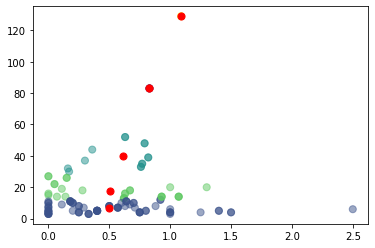

In [28]:
#3. Arranging segmentation

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

df=pd.DataFrame(new,columns=['Experience','Purchases'])

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_


plt.scatter(df['Experience'], df['Purchases'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# For segmentation procedure, I've chosen k-means algorithm implemented via sklearn lib. The number of centroids, which is 5, correlates with experience points of doctors. 
# Notwithstanding that there are 2 clusters with the only value, they are not merged with other segments, inasmuch as they end up delivering significantly higher Purchases.
# In the light of the above, I highly recommend to put a premium on our "outliers" by, for instance, composing brand new set of service inducing check growth.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!